<a href="https://colab.research.google.com/github/Aranzazu21/Machine-Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Tutorial de Regresión Lineal Simple – Salario vs Experiencia

**Autor:** Jorge Limón  
**Fecha:** 27/10/2025  
**Curso/Proyecto:** Machine Learning Básico – Regresión Lineal  

---

## **Objetivo**

El propósito de este notebook es analizar la relación entre **años de experiencia** y **salario** utilizando **Regresión Lineal Simple**.  
La regresión lineal simple permite modelar la relación entre una **variable independiente (X)** y una **variable dependiente (Y)** a través de una **línea recta** que minimiza la diferencia entre los valores reales y los valores predichos.  

---

## **Conceptos Clave**

1. **Variable Independiente (X):** años de experiencia.  
2. **Variable Dependiente (Y):** salario.  
3. **Ecuación de Regresión Lineal Simple:**

\[
Y = \beta_0 + \beta_1 X + \epsilon
\]

- \(\beta_0\) → Intercepto (salario base sin experiencia).  
- \(\beta_1\) → Coeficiente (incremento esperado de salario por año de experiencia).  
- \(\epsilon\) → Error aleatorio.

4. **Objetivo del modelo:** Ajustar los parámetros (\(\beta_0\) y \(\beta_1\)) para minimizar la suma de los errores al cuadrado (**Mínimos Cuadrados Ordinarios – OLS**).

---



In [3]:
# Importar librerías necesarias
import pandas as pd               # Para manipulación de datos (DataFrame)
import numpy as np                # Para cálculos matemáticos y arreglos
import matplotlib.pyplot as plt   # Para gráficos básicos
import seaborn as sns             # Para gráficos estadísticos
from sklearn.model_selection import train_test_split  # Para dividir dataset en train/test
from sklearn.linear_model import LinearRegression    # Para crear el modelo de regresión lineal


###  Explicación de librerías

- **pandas (`pd`)**: manejo y exploración de datos tabulares.  
- **numpy (`np`)**: operaciones matemáticas y arreglos.  
- **matplotlib.pyplot (`plt`)** y **seaborn (`sns`)**: visualización de datos y gráficos estadísticos.  
- **train_test_split**: divide el dataset en conjuntos de entrenamiento y prueba, importante para validar el modelo.  
- **LinearRegression**: clase de scikit-learn que ajusta una línea recta usando mínimos cuadrados.


In [4]:


data = {
    'YearsExperience': [1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,
                        3.9,4.0,4.0,4.1,4.5,4.9,5.1,5.3,5.9,6.0,
                        6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5],
    'Salary': [39343,46205,37731,43525,39891,56642,60150,54445,64445,57189,
               63218,55794,56957,57081,61111,67938,66029,83088,81363,93940,
               91738,98273,101302,113812,109431,105582,116969,112635,122391,121872]
}

df_sal = pd.DataFrame(data)
df_sal.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


###  Explicación

- `pd.read_csv('Salary_Data.csv')`: carga un archivo CSV en un DataFrame de pandas.  
- `.head()`: muestra las primeras 5 filas para verificar que los datos se cargaron correctamente.  
- Dataset contiene 30 registros con:
  - `YearsExperience`: variable independiente (X).  
  - `Salary`: variable dependiente (Y).  
- Este dataset se utiliza como ejemplo clásico de regresión lineal simple en Machine Learning.


In [5]:
# Estadísticas descriptivas
df_sal.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


###  Qué muestra `.describe()`

- `count`: número de registros.  
- `mean`: promedio de años de experiencia y salarios.  
- `std`: desviación estándar (dispersion).  
- `min` y `max`: mínimo y máximo.  
- Percentiles 25%, 50%, 75%: resumen de distribución.  

**Interpretación:**  
- Promedio de experiencia: 5.31 años.  
- Promedio de salario: 76,003.  
- Valores extremos: mínimo salario 37,731; máximo 122,391.  
- Esto ayuda a entender la **varianza de los datos** antes de modelar.


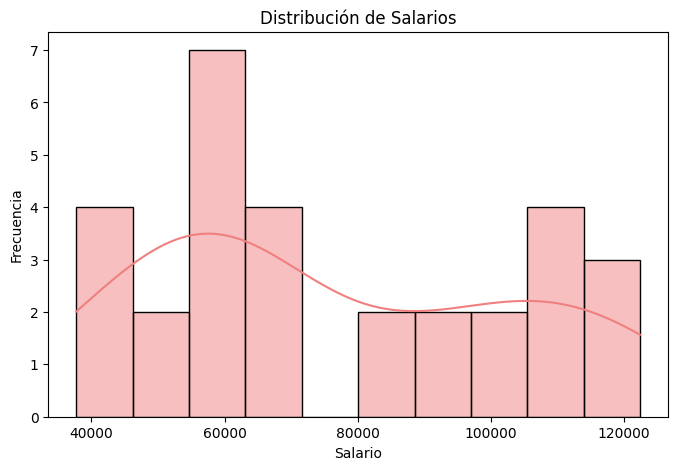

In [6]:
# Distribución de salarios
plt.figure(figsize=(8,5))
sns.histplot(df_sal['Salary'], bins=10, kde=True, color='lightcoral')
plt.title('Distribución de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()


###  Qué deberías observar

- Histograma con curva KDE suavizada.  
- La mayoría de los salarios se concentra en la parte baja-media, pero hay algunos valores altos.  
- Esto permite anticipar si el modelo lineal será adecuado: aquí la relación entre experiencia y salario parece **aproximadamente lineal**, con algunos incrementos notables en salarios altos.


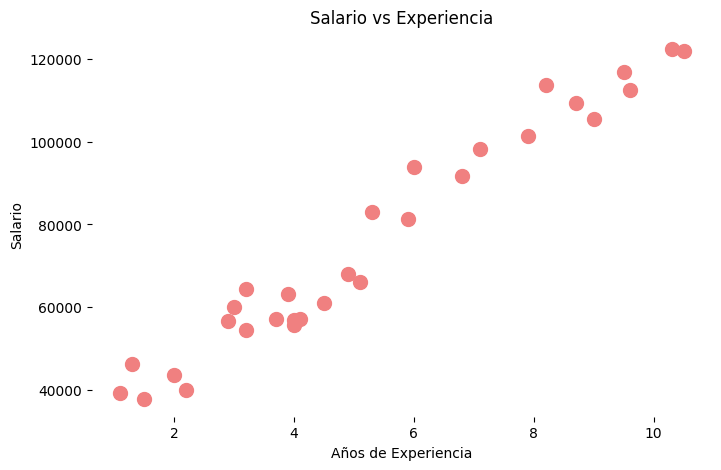

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color='lightcoral', s=100)
plt.title('Salario vs Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.box(False)
plt.show()


###  Explicación

- Gráfico de dispersión (`scatter`) para ver la relación entre años de experiencia y salario.  
- `s=100`: puntos más grandes para mejorar visibilidad.  
- `color='lightcoral'`: consistencia visual.  

**Qué observar:**  
- A medida que aumenta la experiencia, el salario también aumenta.  
- La relación parece **lineal**, lo que justifica usar **regresión lineal simple**.  
- Puntos dispersos permiten observar ligeras variaciones que serán capturadas como error en el modelo (\(\epsilon\)).


In [8]:
# Variables independiente y dependiente
X = df_sal.iloc[:, :1]  # YearsExperience
y = df_sal.iloc[:, 1:]  # Salary

# División en train/test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Explicación

- `iloc[:, :1]` → selecciona la primera columna (X).  
- `iloc[:, 1:]` → selecciona la segunda columna (Y).  
- `train_test_split()` divide los datos:
  - `test_size=0.2` → 20% de los datos para prueba, 80% para entrenamiento.  
  - `random_state=0` → asegura que la división sea **reproducible**.  

**Objetivo:** entrenar el modelo con una parte de los datos y evaluar su desempeño con datos que no ha visto.
